## Kmeans avec opencv

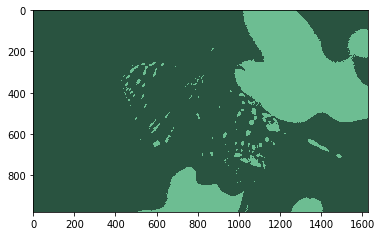

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('original.jpeg?1532741436.jpeg')
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.imshow(res2)

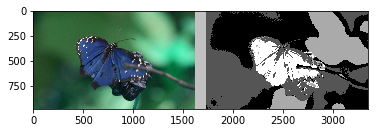

In [5]:
import numpy as np
from sklearn.cluster import KMeans
import argparse
import cv2
import datetime

numClusters = 4
colorSpace = ''
image = cv2.imread('original.jpeg?1532741436.jpeg')
orig = image.copy()

# Change image color space, if necessary.
if colorSpace == 'hsv':
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
elif colorSpace == 'ycrcb' or colorSpace == 'ycc':
    image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
elif colorSpace == 'lab':
    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
else:
    colorSpace = 'bgr'  # set for file naming purposes

# Flatten the 2D image array into an MxN feature vector, where M is
# the number of pixels and N is the dimension (number of channels).
reshaped = image.reshape(image.shape[0] * image.shape[1], image.shape[2])

# Perform K-means clustering.

kmeans = KMeans(n_clusters=numClusters).fit(reshaped)

# Reshape result back into a 2D array, where each element represents the
# corresponding pixel's cluster index (0 to K - 1).
clustering = np.reshape(np.array(kmeans.labels_, dtype=np.uint8),
    (image.shape[0], image.shape[1]))

# Sort the cluster labels in order of the frequency with which they occur.
sortedLabels = sorted([n for n in range(numClusters)],
    key=lambda x: -np.sum(clustering == x))

# Initialize K-means grayscale image; set pixel colors based on clustering.
kmeansImage = np.zeros(image.shape[:2], dtype=np.uint8)
for i, label in enumerate(sortedLabels):
    kmeansImage[clustering == label] = int(255 / (numClusters - 1)) * i

# Concatenate original image and K-means image, separated by a gray strip.
concatImage = np.concatenate((orig,
    193 * np.ones((orig.shape[0], int(0.0625 * orig.shape[1]), 3), dtype=np.uint8),
    cv2.cvtColor(kmeansImage, cv2.COLOR_GRAY2BGR)), axis=1)
plt.imshow(concatImage)
plt.show()